# Project 
1)Cari tau tentang karakteristik laptop untuk programming
2)Tujuan kita adalah mencari dan membuat model harga termurah,sedang dan tinggi dengan ketetapan karakteristik terbaik untuk programming

In [176]:
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_rows',100)

In [3]:
df =pd.read_csv("C:\\Users\\juan\\Videos\\Machine Learning\\Datasets\\laptop_price.csv", encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.groupby('OpSys')['OpSys'].agg('count')

OpSys
Android            2
Chrome OS         27
Linux             62
Mac OS X           8
No OS             66
Windows 10      1072
Windows 10 S       8
Windows 7         45
macOS             13
Name: OpSys, dtype: int64

# Perhatian
1) Kita menemukan karakteristik yang sama pada "OpSys = Android" dengan harga yang berbeda

In [7]:
df.query('OpSys == "No OS"')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.90
11,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,344.99
18,19,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,499.00
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,1192,Lenovo,IdeaPad 510-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,709.00
1196,1214,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M430,No OS,1.9kg,368.00
1201,1219,Lenovo,IdeaPad 310-15ISK,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,8GB,500GB HDD,Nvidia GeForce 920MX,No OS,2.2kg,629.00
1217,1235,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,No OS,2.8kg,539.00


In [9]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [22]:
df1 = df.drop(['laptop_ID','Gpu','Weight','Inches'],axis='columns')
df1

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_euros
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1339.69
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,898.94
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,575.00
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,2537.45
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1803.60
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,764.00


In [27]:
df1_groupby = df1.groupby('Cpu')['Cpu'].agg('count')
df1_groupby

Cpu
AMD A10-Series 9600P 2.4GHz                2
AMD A10-Series 9620P 2.5GHz                2
AMD A10-Series A10-9620P 2.5GHz            2
AMD A12-Series 9700P 2.5GHz                1
AMD A12-Series 9720P 2.7GHz                2
AMD A12-Series 9720P 3.6GHz                5
AMD A4-Series 7210 2.2GHz                  1
AMD A6-Series 7310 2GHz                    1
AMD A6-Series 9220 2.5GHz                  7
AMD A6-Series 9220 2.9GHz                  1
AMD A6-Series A6-9220 2.5GHz               2
AMD A8-Series 7410 2.2GHz                  4
AMD A9-Series 9410 2.9GHz                  3
AMD A9-Series 9420 2.9GHz                  1
AMD A9-Series 9420 3GHz                   11
AMD A9-Series A9-9420 3GHz                 2
AMD E-Series 6110 1.5GHz                   1
AMD E-Series 7110 1.8GHz                   2
AMD E-Series 9000 2.2GHz                   1
AMD E-Series 9000e 1.5GHz                  1
AMD E-Series E2-6110 1.5GHz                1
AMD E-Series E2-9000 2.2GHz                1
AMD E-

In [19]:
df.query('TypeName == "2 in 1 Convertible"')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
23,24,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.0
44,45,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,999.0
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,319.0
95,97,Acer,Spin 5,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.5kg,847.0
112,115,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,1399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1289,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1284,1302,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1285,1303,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0


In [117]:
df2 = df1.query('Cpu.str.contains("Intel Core i7|AMD A12" , case=False)')

In [118]:
df2

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_euros
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,2537.45
6,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Mac OS X,2139.97
8,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Windows 10,1495.00
12,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,macOS,2439.97
16,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Windows 10,745.00
...,...,...,...,...,...,...,...,...,...
1295,Dell,Inspiron 3567,Notebook,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Linux,805.99
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Windows 10,720.32
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00


In [119]:
df2_groupby = df2.groupby('Memory')['Memory'].agg('count')
df2_groupby

Memory
1.0TB Hybrid                   4
128GB SSD                      3
128GB SSD +  1TB HDD          61
128GB SSD +  2TB HDD           2
1TB HDD                       65
1TB SSD                       13
1TB SSD +  1TB HDD             2
256GB Flash Storage            2
256GB SSD                    167
256GB SSD +  1.0TB Hybrid      1
256GB SSD +  1TB HDD          66
256GB SSD +  256GB SSD         2
256GB SSD +  2TB HDD          10
2TB HDD                        6
500GB HDD                      8
512GB SSD                    103
512GB SSD +  1.0TB Hybrid      1
512GB SSD +  1TB HDD          13
512GB SSD +  256GB SSD         1
512GB SSD +  2TB HDD           3
512GB SSD +  512GB SSD         1
8GB SSD                        1
Name: Memory, dtype: int64

In [120]:
df2 = df2[~df2['Ram'].isin(['6GB', '4GB'])]
df2

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_euros
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,2537.45
6,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Mac OS X,2139.97
8,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Windows 10,1495.00
12,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,macOS,2439.97
16,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Windows 10,745.00
...,...,...,...,...,...,...,...,...,...
1281,Dell,Inspiron 3567,Notebook,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Linux,805.99
1285,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00
1293,Lenovo,IdeaPad Y700-15ISK,Notebook,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Windows 10,899.00
1295,Dell,Inspiron 3567,Notebook,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Linux,805.99


In [121]:
df2.query('Memory.str.contains(".*SSD.*" , case=False)')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_euros
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,2537.45
8,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Windows 10,1495.00
12,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,macOS,2439.97
16,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Windows 10,745.00
17,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,macOS,2858.00
...,...,...,...,...,...,...,...,...,...
1256,Asus,Rog G752VT-GC073T,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Windows 10,1900.00
1259,MSI,GE62 Apache,Gaming,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Windows 10,1229.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00
1285,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00


In [122]:
df2 = df2.query('Memory.str.contains(".*SSD.*" , case=False)')

In [123]:
df2

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_euros
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,2537.45
8,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Windows 10,1495.00
12,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,macOS,2439.97
16,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Windows 10,745.00
17,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,macOS,2858.00
...,...,...,...,...,...,...,...,...,...
1256,Asus,Rog G752VT-GC073T,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Windows 10,1900.00
1259,MSI,GE62 Apache,Gaming,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Windows 10,1229.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00
1285,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1499.00


In [126]:
df2.groupby('OpSys')['OpSys'].agg('count')

OpSys
Chrome OS         1
Linux            10
Windows 10      398
Windows 10 S      3
Windows 7        17
macOS             3
Name: OpSys, dtype: int64

In [127]:
df2 = df2[df2['OpSys'] != 'No OS']

In [131]:
df2 = df2.drop_duplicates()

In [141]:
df2['Price_rupiah'] = df2['Price_euros'] * 16439

C:\Users\juan\AppData\Local\Temp\ipykernel_7688\2753969714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price_rupiah'] = df2['Price_euros'] * 16439


In [149]:
df2 = df2.drop('Price_euros',axis='columns')
df2

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_rupiah
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,41713140.55
8,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Windows 10,24576305.00
12,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,macOS,40110666.83
16,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Windows 10,12247055.00
17,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,macOS,46982662.00
...,...,...,...,...,...,...,...,...,...
1245,Asus,Rog GL553VE-FY052T,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Windows 10,26302400.00
1247,Asus,Rog GL502VS,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Windows 10,38220675.00
1256,Asus,Rog G752VT-GC073T,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Windows 10,31234100.00
1259,MSI,GE62 Apache,Gaming,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Windows 10,20203531.00


In [157]:
df2['Price_rupiah'].value_counts()

Price_rupiah
29573761.0    11
24642061.0     8
21354261.0     7
37793261.0     6
31217661.0     6
              ..
23458453.0     1
18779913.6     1
16603390.0     1
40193355.0     1
20203531.0     1
Name: count, Length: 314, dtype: int64

<Axes: xlabel='Ram'>

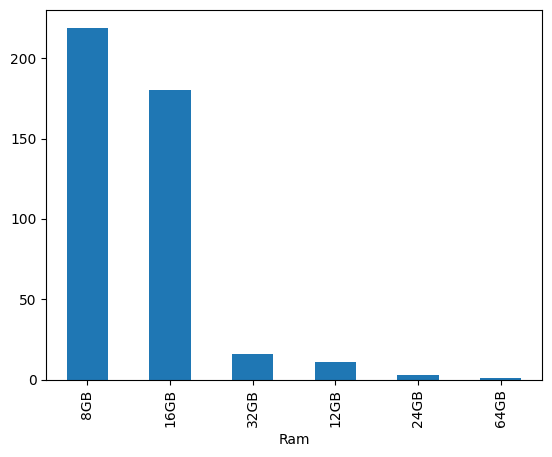

In [170]:
df2['Ram'].value_counts() \
    .plot(kind='bar')

In [163]:
df2.query('TypeName == "Workstation"')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_rupiah
297,Dell,Precision 7720,Workstation,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Windows 10,47424213.54
353,HP,Zbook 15,Workstation,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Windows 10,28575420.53
388,Dell,Precision 5520,Workstation,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8GB,256GB SSD,Windows 10,35097265.00
398,Dell,Precision M5520,Workstation,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Windows 10,44582568.00
410,Lenovo,ThinkPad P51,Workstation,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,512GB SSD,Windows 10,31645075.00
433,Lenovo,Thinkpad T570,Workstation,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16GB,512GB SSD,Windows 10,40193355.00
451,Dell,Precision 3520,Workstation,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,256GB SSD,Windows 10,32467025.00
452,HP,ProBook 650,Workstation,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,512GB SSD,Windows 10,25217426.00
476,Dell,Precision M5520,Workstation,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Windows 10,39585112.00
486,Dell,Precision 3520,Workstation,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Windows 10,38434382.00


<Axes: xlabel='Ram', ylabel='Price_rupiah'>

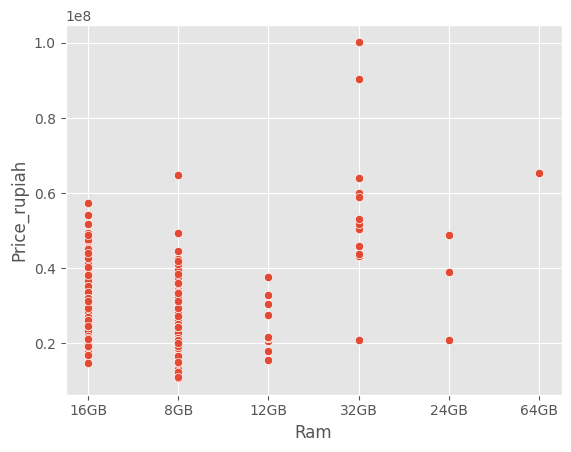

In [177]:
sns.scatterplot(x='Ram',y='Price_rupiah',data=df2)

In [179]:
df2.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,OpSys,Price_rupiah
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,41713140.55
8,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Windows 10,24576305.00
12,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,macOS,40110666.83
16,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Windows 10,12247055.00
17,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,macOS,46982662.00


In [186]:
len(df2['Price_rupiah'].unique())

314